## Following, we have a simple Perceptron implementation in Python using NumPy, answering the first bullet of problem 3






In [12]:
import numpy
from random import choice 

activate = lambda x: 0 if x < 0 else 1 # This will activate a neuron if its value is higher than 0
training_data = [ (np.array([1,4,1]), 0), (np.array([1,5,1]), 0), (np.array([2,4,1]), 0), (np.array([2,5,1]), 0), (np.array([3,1,1]), 1), (np.array([3,2,1]), 1), (np.array([4,1,1]), 1), (np.array([4,2,1]), 1)] 
# The first two entries of the NumPy array are the two input values.
# The third entry of the array is the bias which is needed to move the threshold (also known as the decision boundary) up or down as needed by the activation function. 
# The second element of the tuple is the expected result or the target value.

w = np.random.rand(3) # Initialize the weights randomly
learning_rate = 0.01 
epochs = 100 # Arbitrary number, feel free to change
for i in range(epochs):
  x, expected = choice(training_data) # Get a random input set from the training data
  result = np.dot(w, x)
  error = expected - activate(result) # Can be -1, 0, 1
  
  w += learning_rate * error * x # Fix the weights through the unified perceptron learning rule
 
print("Final Weights: ",  w)
  
i = 0
for x, _ in training_data:
  i = i + 1
  result = np.dot(x, w)
  print("p_%d"%(i),"--- " "{} --- Value before activation: {} -> Value after activation: {}".format(x[:2], result, activate(result)))
  


Final Weights:  [ 0.46909324 -0.35682067  0.32024546]
p_1 --- [1 4] --- Value before activation: -0.6379439895491833 -> Value after activation: 0
p_2 --- [1 5] --- Value before activation: -0.994764663197043 -> Value after activation: 0
p_3 --- [2 4] --- Value before activation: -0.16885074895096763 -> Value after activation: 0
p_4 --- [2 5] --- Value before activation: -0.5256714225988273 -> Value after activation: 0
p_5 --- [3 1] --- Value before activation: 1.370704512590827 -> Value after activation: 1
p_6 --- [3 2] --- Value before activation: 1.0138838389429674 -> Value after activation: 1
p_7 --- [4 1] --- Value before activation: 1.8397977531890426 -> Value after activation: 1
p_8 --- [4 2] --- Value before activation: 1.482977079541183 -> Value after activation: 1


## *The program is also created on TensorFlow in order for us to have better intuitions and also create a robust solution for problem 3*

Final Weight 1 [2.9660308]
Final Weight 2 [-3.2286415]
Bias: [[1.9091275]]


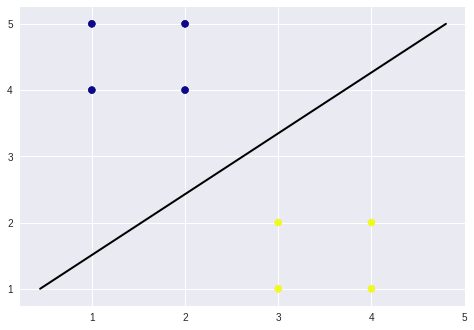

In [37]:
# The program is also created on TensorFlow in order for us to have better intuitions and also create a robust solution for problem 3

# Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Number of features & iterations, feel free to change
NUM_FEATURES = 2
NUM_ITERATIONS = 2000 # Feel free to change

# Initialize input p and targets for the variables
p = np.array([[1,4], [1,5], [2,4], [2,5], [3,1], [3,2], [4,1], [4,2]], np.float32) # 8x2 features
targets = np.array([0,0,0,0,1,1,1,1], np.float32).reshape([8,1]) # 8x1 target variables

# Create 2 placeholders for input p and target for the TensorFlow variables
P = tf.placeholder(tf.float32, shape=[8, NUM_FEATURES], name='P') # The NUM_FEATURES variable is added to ensure that the decision boundary of any solution will not intersect one of the original input vectors 
T = tf.placeholder(tf.float32, shape=[8, 1], name='T') # 8x1, same as targets

# Create 2 TensorFlow vriables for the weight W and the bias B
W = tf.Variable(tf.random_normal([NUM_FEATURES, 1]), tf.float32, name='W') # Initialize weights randomly
B = tf.Variable(tf.zeros([1, 1]), tf.float32, name='B') # Initialize bias equal to zero

# Calculate the activation // activate(w.T*p + b) 
predictions = tf.nn.sigmoid(tf.add(tf.matmul(P, W), B)) # tanh, ReLU, etc would work too
    
# Calculate the loss  
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=predictions, labels=T) # 'T' must have the same type and shape as logits.

# Calculate the training step
training_step = tf.train.AdamOptimizer(learning_rate).minimize(loss) # We could use Gradient Descent but we wanted to test how superior Adam is

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
with tf.Session() as sess: 
  sess.run(init) # Run the session or else 'the computational graph'
  for epoch in range(NUM_ITERATIONS): # For some iterations
    sess.run(training_step, feed_dict={P: p, T: targets}) # Train the Perceptron
    #weights = W.eval() # Hold the final value of it
    #bias = B.eval()
    weights = sess.run(W) 
    bias = sess.run(B)
  

# Prints
print("Final Weight 1", weights[0])
print("Final Weight 2", weights[1])
print("Bias:", bias)

# Decision Boundary
x1 = np.array([np.min(p[:, 1]), np.max(p[:, 1])])
x0 = np.squeeze(((-1/weights[0])*(weights[1]*x1+bias)))

# Scatterplot
plt.scatter(p[:, 0], p[:, 1], c=[0,0,0,0,1,1,1,1], cmap='plasma')

# Plot
plt.plot(x0, x1, color='k', linewidth=2)

# From the following plot, we can see that the accuracy is 100% 
# since the decision boundary is in a good positiong, classifying the 2 labels correctly.

# Beware that some times it may need more epochs/generations for the perceptron to be correct.